Files already downloaded and verified
Files already downloaded and verified
Epoch [1/6], Loss: 1.7035
Epoch [2/6], Loss: 1.2360
Epoch [3/6], Loss: 1.0035
Epoch [4/6], Loss: 0.8743
Epoch [5/6], Loss: 0.7873
Epoch [6/6], Loss: 0.7206
Accuracy of the network on the 10000 test images: 72.53 %
Epoch [1/6], Loss: 1.6364
Epoch [2/6], Loss: 1.1555
Epoch [3/6], Loss: 0.9193
Epoch [4/6], Loss: 0.7883
Epoch [5/6], Loss: 0.6923
Epoch [6/6], Loss: 0.6187
Accuracy of the network on the 10000 test images: 75.53 %


NameError: name 'baseline_train_losses' is not defined

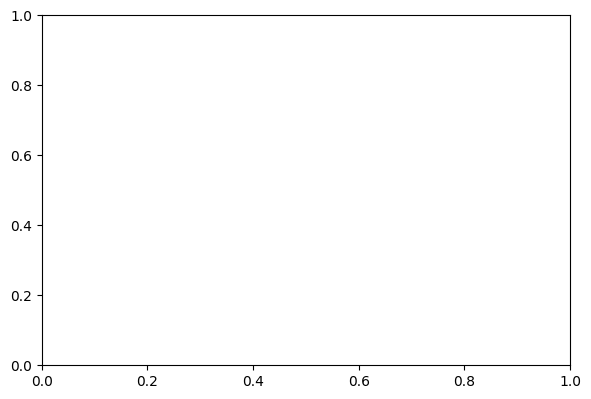

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F

# 数据预处理
transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.Resize((32, 32)),  # Resize
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616)),
])

# 加载数据集
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=4)

# Baseline 模型定义
class BaselineNet(nn.Module):
    def __init__(self):
        super(BaselineNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Modified 模型定义（可以自行调整）
class ModifiedNet(nn.Module):
    def __init__(self):
        super(ModifiedNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 4 * 4, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = x.view(-1, 256 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 训练和评估函数
def train_model(model, trainloader, criterion, optimizer, num_epochs=6):
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(trainloader):.4f}')

def eval_net(net, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print('Accuracy of the network on the 10000 test images: %.2f %%' % accuracy)
    return accuracy

# 初始化模型、损失函数和优化器
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
baseline_model = BaselineNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(baseline_model.parameters(), lr=0.001, momentum=0.9)

# 训练 Baseline 模型
train_model(baseline_model, trainloader, criterion, optimizer, num_epochs=6)

# 保存模型
torch.save(baseline_model.state_dict(), 'baseline.pth')

# 评估 Baseline 模型
eval_net(baseline_model, testloader)

# 如果有 Modified 模型，可以取消下面的注释并重复训练和评估过程
modified_model = ModifiedNet().to(device)
optimizer = optim.SGD(modified_model.parameters(), lr=0.001, momentum=0.9)
train_model(modified_model, trainloader, criterion, optimizer, num_epochs=6)
torch.save(modified_model.state_dict(), 'modified.pth')
eval_net(modified_model, testloader)

# 可视化损失和准确率（需要记录训练过程中的数据）
# 可视化损失和准确率
plt.figure(figsize=(15, 10))

# 损失图
plt.subplot(2, 2, 1)
plt.plot(baseline_train_losses, label="Baseline Train Loss", color='blue')
plt.plot(baseline_val_losses, label="Baseline Val Loss", color='cyan')
plt.plot(modified_train_losses, label="Modified Train Loss", color='orange')
plt.plot(modified_val_losses, label="Modified Val Loss", color='red')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(ticks=range(0, 7), labels=range(1, 7))  # 修改x轴标签为1到15的epoch
plt.legend()

# 准确率图
plt.subplot(2, 2, 2)
plt.plot(baseline_train_acc, label="Baseline Train Acc", color='blue')
plt.plot(baseline_val_acc, label="Baseline Val Acc", color='cyan')
plt.plot(modified_train_acc, label="Modified Train Acc", color='orange')
plt.plot(modified_val_acc, label="Modified Val Acc", color='red')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.xticks(ticks=range(0, 7), labels=range(1, 7))  # 修改x轴标签为1到15的epoch
plt.legend()

plt.tight_layout()
plt.show()

Files already downloaded and verified
Files already downloaded and verified


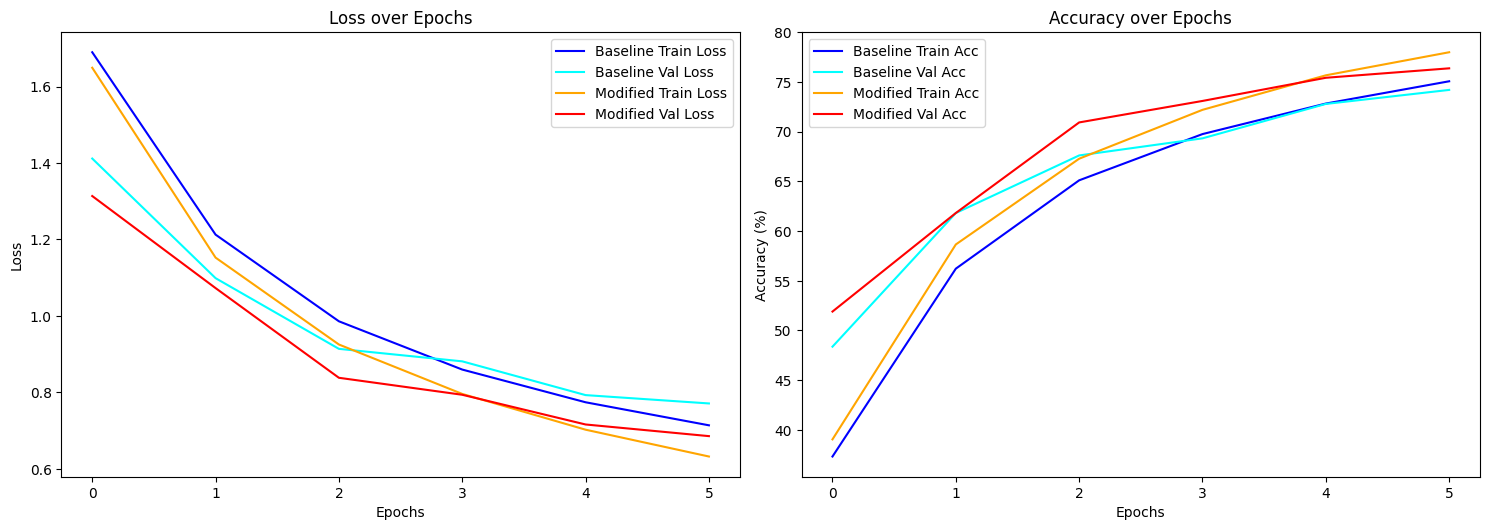

Accuracy of the network on the 10000 test images: 73 %
Accuracy of the network on the 10000 test images: 76 %


In [5]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F

# 数据预处理
transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.Resize((32, 32)),  # Resize
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616)),
])

# 加载数据集
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=4)

# Baseline 模型定义
class BaselineNet(nn.Module):
    def __init__(self):
        super(BaselineNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Modified 模型定义（请自行调整）
class ModifiedNet(nn.Module):
    def __init__(self):
        super(ModifiedNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = x.view(-1, 256 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 初始化损失和准确率记录列表
baseline_train_losses = []
baseline_val_losses = []
modified_train_losses = []
modified_val_losses = []
baseline_train_acc = []
baseline_val_acc = []
modified_train_acc = []
modified_val_acc = []

# 评估模型的函数
def evaluate_model(net, dataloader):
    net.eval()  # 设置为评估模式
    correct = 0
    total = 0
    val_loss = 0
    criterion = nn.CrossEntropyLoss()
    
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            outputs = net(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return val_loss / len(dataloader), 100 * correct / total

# 训练 Baseline 模型
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
baseline_model = BaselineNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(baseline_model.parameters(), lr=0.001, momentum=0.9)

for epoch in range(6):
    baseline_model.train()  # 设置为训练模式
    running_loss = 0.0
    correct = 0
    total = 0
    
    for i, data in enumerate(trainloader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = baseline_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
        
    # 记录训练损失和准确率
    baseline_train_losses.append(running_loss / len(trainloader))
    baseline_train_acc.append(100 * correct / total)
    
    # 评估并记录验证损失和准确率
    val_loss, val_acc = evaluate_model(baseline_model, testloader)
    baseline_val_losses.append(val_loss)
    baseline_val_acc.append(val_acc)

# 训练 Modified 模型
modified_model = ModifiedNet().to(device)
optimizer = optim.SGD(modified_model.parameters(), lr=0.001, momentum=0.9)

for epoch in range(6):
    modified_model.train()  # 设置为训练模式
    running_loss = 0.0
    correct = 0
    total = 0
    
    for i, data in enumerate(trainloader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = modified_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    # 记录训练损失和准确率
    modified_train_losses.append(running_loss / len(trainloader))
    modified_train_acc.append(100 * correct / total)
    
    # 评估并记录验证损失和准确率
    val_loss, val_acc = evaluate_model(modified_model, testloader)
    modified_val_losses.append(val_loss)
    modified_val_acc.append(val_acc)

# 可视化损失和准确率
plt.figure(figsize=(15, 10))

# 损失图
plt.subplot(2, 2, 1)
plt.plot(baseline_train_losses, label="Baseline Train Loss", color='blue')
plt.plot(baseline_val_losses, label="Baseline Val Loss", color='cyan')
plt.plot(modified_train_losses, label="Modified Train Loss", color='orange')
plt.plot(modified_val_losses, label="Modified Val Loss", color='red')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 准确率图
plt.subplot(2, 2, 2)
plt.plot(baseline_train_acc, label="Baseline Train Acc", color='blue')
plt.plot(baseline_val_acc, label="Baseline Val Acc", color='cyan')
plt.plot(modified_train_acc, label="Modified Train Acc", color='orange')
plt.plot(modified_val_acc, label="Modified Val Acc", color='red')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

# 评估模型
def eval_net(net, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))

eval_net(baseline_model, testloader)
eval_net(modified_model, testloader)

# 保存模型
torch.save(baseline_model.state_dict(), 'baseline.pth')
torch.save(modified_model.state_dict(), 'modified.pth')
